# Example from YouTube (Abraham Asfaw):
https://www.youtube.com/watch?v=M4EkW4VwhcI&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=2

## Preparations

In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.2',
 'qiskit': '0.19.4'}

In [3]:
from qiskit import IBMQ

In [4]:
if False:
    # Run only once from a file in local directory, contain the key from 
    # https://quantum-computing.ibm.com
    f = open('mykey.txt', 'r')
    IBMQ.save_account(f.read())

In [25]:
if False:
    # run after clear
    IBMQ.load_account()

# Hello World

In [6]:
from qiskit import *
%matplotlib inline
from matplotlib import style

In [9]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
style.use('dark_background')
circuit.draw()

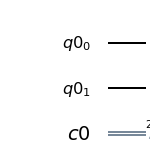

In [12]:
circuit.draw(output='mpl')

## Create enagelment

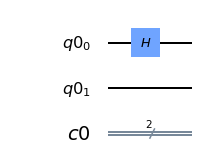

In [14]:
# Hadamard gate rotates the states |0> and |1> to |+ > and |- > 
circuit.h(qr[0]) # 
circuit.draw(output='mpl')

### if loop --> check in qr[0], result at qr[1] (part of entangelment)

In [15]:
circuit.cx(qr[0], qr[1])

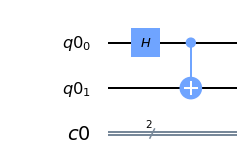

In [16]:
circuit.draw(output='mpl')

In [17]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0_0: ══════════
                
c0_1: ══════════

## Save the qbits into the classical bits

In [18]:
circuit.measure(qr, cr)

In [19]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0_0: ═══════════╩══╬═
                    ║ 
c0_1: ══════════════╩═

## Run local simulator (ideal case - no errors)

In [20]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = qiskit.execute(circuit, backend = simulator).result()

In [22]:
from qiskit.tools.visualization import plot_histogram

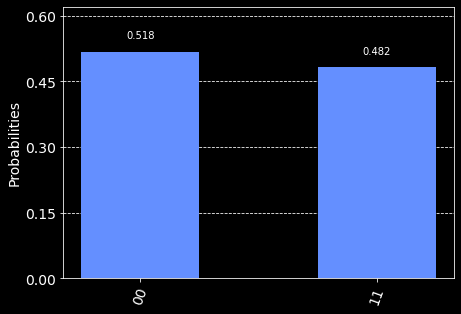

In [23]:
plot_histogram(result.get_counts(circuit))

## Run cloud quantum compute (contain errors, yet)

In [26]:
from qiskit.tools.monitor import job_monitor

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = qiskit.execute(circuit, backend=qcomp)
job_monitor(job)

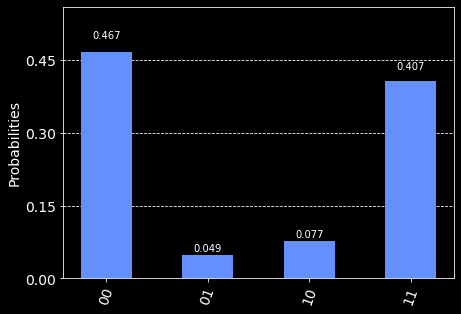

In [32]:
result = job.result()
plot_histogram(result.get_counts(circuit))

Gates description: https://quantum-computing.ibm.com/docs/circ-comp/q-gates

In [34]:
from qiskit.tools.visualization import plot_bloch_multivector

## X gate (similar to not)

In [54]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = qiskit.execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
circuit.draw()

[0.+0.j 1.+0.j]


┌───┐
q_0: ┤ X ├
     └───┘
c_0: ═════

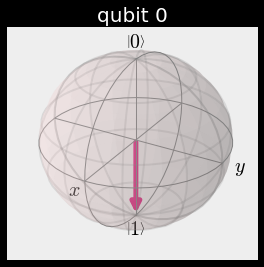

In [55]:
style.use('fivethirtyeight')
style.use('dark_background')
style.use('bmh')
plot_bloch_multivector(statevector)

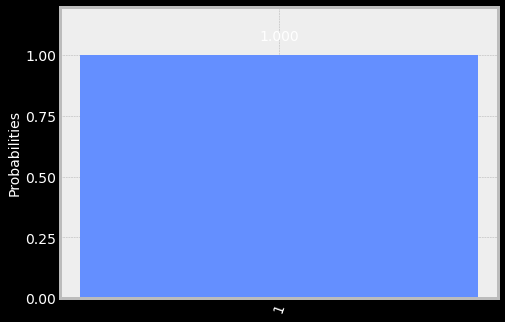

In [56]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = qiskit.execute(circuit, backend = backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [62]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator') # presentation of the result as a matrix
result = qiskit.execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


## Teleportation of a qubit into another

In [86]:
circuit = QuantumCircuit(3, 3) # 3 qubit and 3 classical
circuit.x(0) # Teleport qubit 0 --> converted to |1>
circuit.barrier()
# Entangelment on bit 1
circuit.h(1) # Entangelment on bit 1
circuit.cx(1, 2) # Control gate by 1 to 2

circuit.cx(0, 1) # Control gate by 0 to 1
circuit.h(0) 
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.barrier()
circuit.cx(1, 2) # Control gate by 1 to 2
circuit.cz(0, 2) # Control gate by 1 to 2 ----> Unclear
circuit.measure(2, 2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c_0: ════════════════════════════════╩══╬═════════════╬═
                                        ║             ║ 
c_1: ═══════════════════════════════════╩═════════════╬═
                                                      ║ 
c_2: ═════════════════════════════════════════════════╩═

{'110': 263, '100': 265, '111': 250, '101': 246}


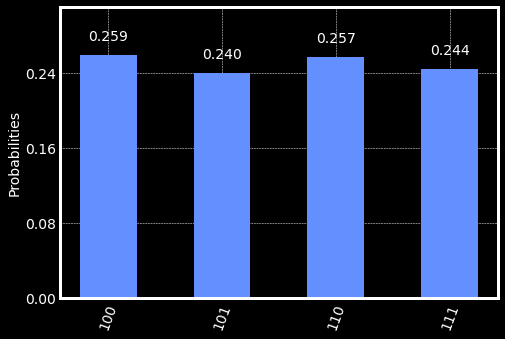

In [87]:
backend = Aer.get_backend('qasm_simulator')
result = qiskit.execute(circuit, backend = backend, shots=1024).result()
counts = result.get_counts()
style.use('dark_background')
print(counts) # first bit is #2, last bit is #0 ==> we'll get only states were #2 == |1>
plot_histogram(counts)

## Bernstein-Vazirani Algorithm (find 6 bit number in one q-operation)

In [93]:
secretnumber = '101001'
circuit = QuantumCircuit(6+1, 6)
circuit.h([0, 1, 2, 3, 4, 5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

# Encode the secret number 
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()


circuit.h([0, 1, 2, 3, 4, 5])
circuit.barrier()
circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

circuit.draw()

┌───┐      ░                 ░ ┌───┐ ░ ┌─┐               
q_0: ┤ H ├──────░─────────────■───░─┤ H ├─░─┤M├───────────────
     ├───┤      ░             │   ░ ├───┤ ░ └╥┘┌─┐            
q_1: ┤ H ├──────░─────────────┼───░─┤ H ├─░──╫─┤M├────────────
     ├───┤      ░             │   ░ ├───┤ ░  ║ └╥┘┌─┐         
q_2: ┤ H ├──────░─────────────┼───░─┤ H ├─░──╫──╫─┤M├─────────
     ├───┤      ░             │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐      
q_3: ┤ H ├──────░────────■────┼───░─┤ H ├─░──╫──╫──╫─┤M├──────
     ├───┤      ░        │    │   ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├──────░────────┼────┼───░─┤ H ├─░──╫──╫──╫──╫─┤M├───
     ├───┤      ░        │    │   ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├──────░───■────┼────┼───░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║ 
c_0: ════════════════════════════════════════╩══╬══╬══╬══╬══╬═
                                                ║  ║  ║  ║  ║ 
c_1: ═══════════════════════════════════════════╩══╬══╬══╬══╬═
                                                   ║  ║  ║  ║ 
c_2: ══════════════════════════════════════════════╩══╬══╬══╬═
                                                      ║  ║  ║ 
c_3: ═════════════════════════════════════════════════╩══╬══╬═
                                                         ║  ║ 
c_4: ════════════════════════════════════════════════════╩══╬═
                                                            ║ 
c_5: ═══════════════════════════════════════════════════════╩═

In [95]:
backend = Aer.get_backend('qasm_simulator')
result = qiskit.execute(circuit, backend = backend, shots=1).result() # 1 shot for one operation
counts = result.get_counts()
print('The secret number is: ', counts)

The secret number is:  {'101001': 1}


In [96]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = qiskit.execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


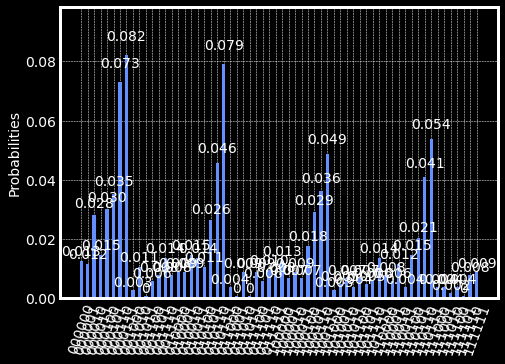

In [97]:
result = job.result()
plot_histogram(result.get_counts(circuit))

Job Status: job has successfully run


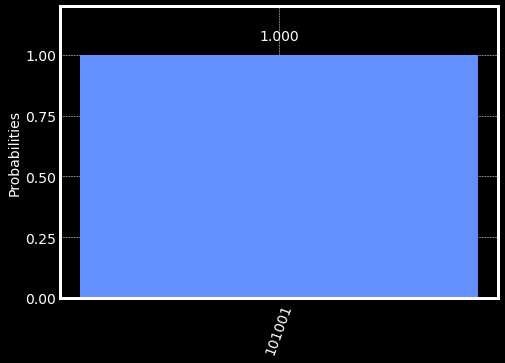

In [98]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator') # probably a simulator rather than real quantum computer
job = qiskit.execute(circuit, backend=qcomp)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))

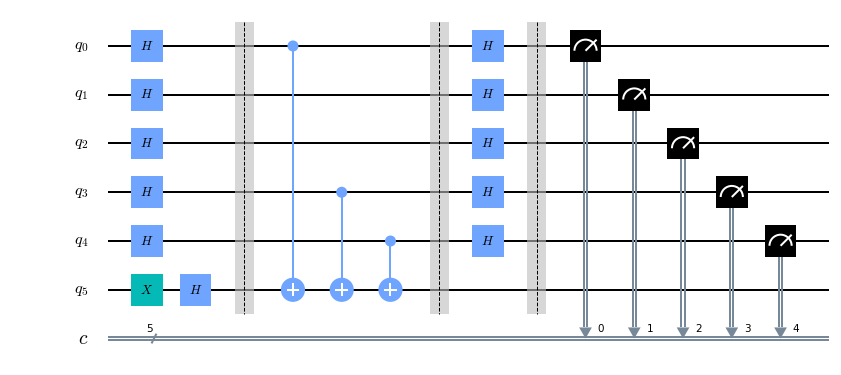

In [111]:
# Any secret number
secretnumber = '11001' # Any number up to 15 digits could work
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

# Encode the secret number 
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()


circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output='mpl')

Job Status: job has successfully run
{'10010': 29, '01110': 10, '10111': 30, '00000': 24, '00001': 59, '11001': 64, '01001': 60, '00010': 18, '01010': 31, '11110': 10, '10101': 23, '11101': 21, '00011': 76, '11111': 19, '11010': 27, '01100': 8, '10000': 24, '10001': 75, '00100': 6, '11100': 4, '00101': 13, '00110': 7, '10110': 11, '11011': 94, '01111': 11, '10100': 6, '01000': 16, '10011': 113, '00111': 15, '11000': 27, '01011': 74, '01101': 19}


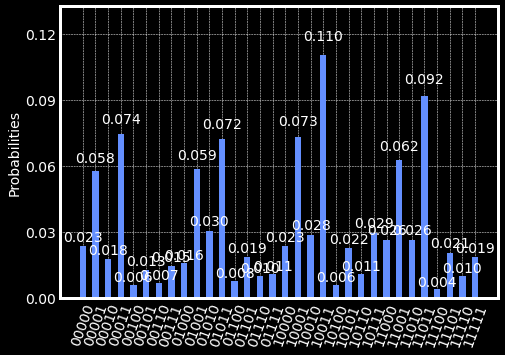

In [112]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne') 
job = qiskit.execute(circuit, backend=qcomp)
job_monitor(job)
result = job.result()
print(result.get_counts(circuit))
plot_histogram(result.get_counts(circuit))